##### Bagging Classification

##### Dataset

Download `wisc_bc_data.csv`

Location: https://mitu.co.in/dataset

Import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

load the dataset

In [2]:
df = pd.read_csv('datasets/wisc_bc_data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Separate the input and output data

In [3]:
# input data
x = df.drop(['id', 'diagnosis'], axis=1)

# output data
y = df['diagnosis']

([<matplotlib.patches.Wedge at 0x211338eeed0>,
 [Text(-0.4286546999573329, 1.0130425204326268, 'B'),
  Text(0.428654605109445, -1.013042560566172, 'M')],
 [Text(-0.23381165452218156, 0.5525686475087055, '62.74%'),
  Text(0.23381160278696997, -0.55256866939973, '37.26%')])

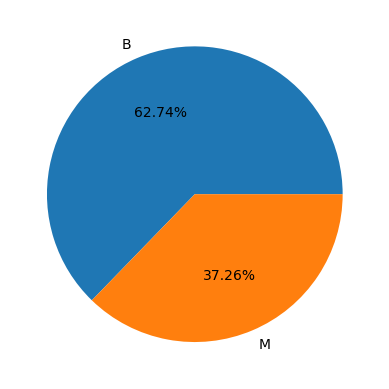

In [5]:
plt.pie(y.value_counts(), labels=y.value_counts().index, autopct='%.2f%%')

<Axes: xlabel='count', ylabel='diagnosis'>

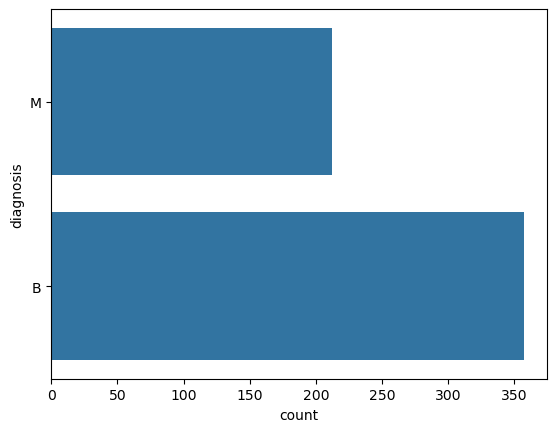

In [4]:
sns.countplot(y=y)

Cross-Validation

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [16]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

Build the model

In [7]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

Performance Evaluation

In [9]:
y_pred = nb.predict(x_test)

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

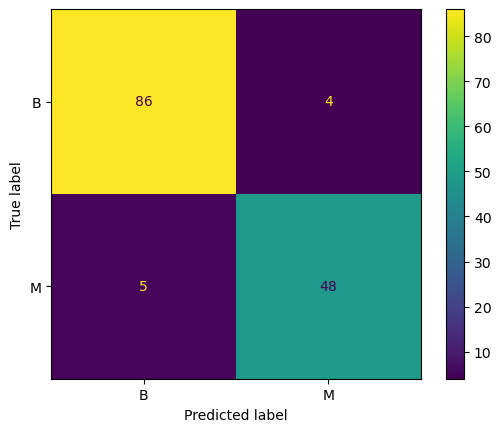

In [11]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.95      0.96      0.95        90
           M       0.92      0.91      0.91        53

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



In [15]:
accuracy_score(y_test, y_pred)

0.9370629370629371

In [18]:
new = x_test.iloc[[100]]
new

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
71,8.888,14.64,58.79,244.0,0.09783,0.1531,0.08606,0.02872,0.1902,0.0898,...,9.733,15.67,62.56,284.4,0.1207,0.2436,0.1434,0.04786,0.2254,0.1084


In [21]:
y_test.iloc[[100]]

71    B
Name: diagnosis, dtype: object

In [22]:
nb.predict(new)

array(['B'], dtype='<U1')

##### Bagging on Naive Bayes

In [23]:
from sklearn.ensemble import BaggingClassifier

In [34]:
bag = BaggingClassifier(estimator=GaussianNB(), n_estimators=20, random_state=0)

In [35]:
bag.fit(x_train, y_train)

BaggingClassifier(estimator=GaussianNB(), n_estimators=20, random_state=0)

In [36]:
y_pred = bag.predict(x_test)

In [46]:
confusion_matrix(y_test, y_pred)

array([[86,  4],
       [ 5, 48]], dtype=int64)

In [39]:
accuracy_score(y_test, y_pred)

0.9370629370629371

##### Bagging on Logistic Regression

In [51]:
import warnings
warnings.filterwarnings('default')

In [56]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train, y_train)
y_pred = log.predict(x_test)
accuracy_score(y_test, y_pred)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9440559440559441

In [48]:
bag = BaggingClassifier(estimator=LogisticRegression(), n_estimators=20, random_state=0)
bag.fit(x_train, y_train)
y_pred = bag.predict(x_test)
accuracy_score(y_test, y_pred)

0.9370629370629371

##### Bagging on SVM Polynomial

In [57]:
from sklearn.svm import SVC
svm = SVC(kernel='poly')
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
accuracy_score(y_test, y_pred)

0.9230769230769231

In [58]:
bag = BaggingClassifier(estimator=SVC(kernel='poly'), n_estimators=20, random_state=0)
bag.fit(x_train, y_train)
y_pred = bag.predict(x_test)
accuracy_score(y_test, y_pred)

0.9230769230769231